# Analyzing Data Science Job Salaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./ds_salaries.csv')

## Business Understanding

### 1st Question

### 2nd Question

### 3rd Question

## Data Understanding

In [2]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.shape

(607, 12)

In [4]:
df.isna().any().any()

False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
pd.set_option('display.max_rows', None)
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts'], ascending = False))

counts
column             value                                           
salary_currency    USD                                          398
                   EUR                                           95
                   GBP                                           44
                   INR                                           27
                   CAD                                           18
                   TRY                                            3
                   JPY                                            3
                   PLN                                            3
                   SGD                                            2
                   MXN                                            2
                   HUF                                            2
                   AUD                                            2
                   BRL                                            2
                   CNY                                            2
                   DKK                                            2
                   CHF                                            1
                   CLP                                            1
job_title          Data Scientist                               143
                   Data Engineer                                132
                   Data Analyst                                  97
                   Machine Learning Engineer                     41
                   Research Scientist                            16
                   Data Science Manager                          12
                   Data Architect                                11
                   Machine Learning Scientist                     8
                   Big Data Engineer                              8
                   Data Analytics Manager                         7
                   AI Scientist                                   7
                   Director of Data Science                       7
                   Data Science Consultant                        7
                   Principal Data Scientist                       7
                   BI Data Analyst                                6
                   ML Engineer                                    6
                   Lead Data Engineer                             6
                   Computer Vision Engineer                       6
                   Data Engineering Manager                       5
                   Business Data Analyst                          5
                   Applied Data Scientist                         5
                   Head of Data                                   5
                   Data Analytics Engineer                        4
                   Head of Data Science                           4
                   Applied Machine Learning Scientist             4
                   Analytics Engineer                             4
                   Computer Vision Software Engineer              3
                   Data Science Engineer                          3
                   Lead Data Scientist                            3
                   Machine Learning Developer                     3
                   Principal Data Engineer                        3
                   Lead Data Analyst                              3
                   Machine Learning Infrastructure Engineer       3
                   ETL Developer                                  2
                   Cloud Data Engineer                            2
                   Director of Data Engineering                   2
                   Principal Data Analyst                         2
                   Product Data Analyst                           2
                   Financial Data Analyst                         2
                   Machine Learning Manager                       1
                   Staff Data Scientist          

## Data Preparartion

Converting Columns with type `object`

In [8]:
ordinal_cols_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}


In [9]:
df['experience_level_code'] = df['experience_level'].replace(ordinal_cols_mapping)
df['experience_level_code'].head()

0    2
1    3
2    3
3    2
4    3
Name: experience_level_code, dtype: int64

In [10]:
df_encoded = pd.get_dummies(df, columns=['employment_type', 'salary_currency', 'employee_residence', 'company_location', 'company_size'])

In [11]:
pd.set_option('display.max_rows', 10)
print(df_encoded)

     Unnamed: 0  work_year experience_level                   job_title  \
0             0       2020               MI              Data Scientist   
1             1       2020               SE  Machine Learning Scientist   
2             2       2020               SE           Big Data Engineer   
3             3       2020               MI        Product Data Analyst   
4             4       2020               SE   Machine Learning Engineer   
..          ...        ...              ...                         ...   
602         602       2022               SE               Data Engineer   
603         603       2022               SE               Data Engineer   
604         604       2022               SE                Data Analyst   
605         605       2022               SE                Data Analyst   
606         606       2022               MI                AI Scientist   

     salary  salary_in_usd  remote_ratio  experience_level_code  \
0     70000          79833      

In [19]:
pd.set_option('display.max_rows', None)
print(df_encoded.corr()['salary'])

Unnamed: 0              -0.096250
work_year               -0.087577
salary                   1.000000
salary_in_usd           -0.083906
remote_ratio            -0.014608
experience_level_code   -0.027517
employment_type_CT      -0.008268
employment_type_FL      -0.014568
employment_type_FT       0.025685
employment_type_PT      -0.020006
salary_currency_AUD     -0.007582
salary_currency_BRL     -0.008875
salary_currency_CAD     -0.022768
salary_currency_CHF     -0.005502
salary_currency_CLP      0.791761
salary_currency_CNY     -0.002031
salary_currency_DKK     -0.003130
salary_currency_EUR     -0.074455
salary_currency_GBP     -0.047528
salary_currency_HUF      0.397792
salary_currency_INR      0.243328
salary_currency_JPY      0.288923
salary_currency_MXN      0.002422
salary_currency_PLN     -0.008099
salary_currency_SGD     -0.006856
salary_currency_TRY     -0.006607
salary_currency_USD     -0.166996
employee_residence_AE   -0.010231
employee_residence_AR   -0.006950
employee_resid

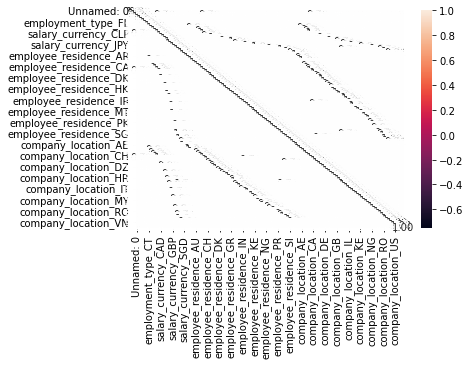

In [13]:
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f");

## Data Modelling 

## Results

In [ ]:
https://www.kaggle.com/code/priyark/data-science-job-salaries-plotly-interactive-graph